<a href="https://colab.research.google.com/github/alejobz30/vivienda_costo/blob/main/3_ENTREGA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importación de librerías**

In [ ]:
%pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# **1.1 Se cargan los archivos con los datos a utilizar**

In [2]:
!wget https://github.com/alejobz30/vivienda_costo/blob/1f06cf9b7db94a165bd0b699f012489e724f54c1/test.zip?raw=true
!wget https://github.com/alejobz30/vivienda_costo/blob/1f06cf9b7db94a165bd0b699f012489e724f54c1/train.zip?raw=true

! unzip /content/test.zip?raw=true
datos=pd.read_csv("test.csv")

! unzip /content/train.zip?raw=true
prueba=pd.read_csv("train.csv")

--2023-05-29 01:33:27--  https://github.com/alejobz30/vivienda_costo/blob/1f06cf9b7db94a165bd0b699f012489e724f54c1/test.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alejobz30/vivienda_costo/raw/1f06cf9b7db94a165bd0b699f012489e724f54c1/test.zip [following]
--2023-05-29 01:33:27--  https://github.com/alejobz30/vivienda_costo/raw/1f06cf9b7db94a165bd0b699f012489e724f54c1/test.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alejobz30/vivienda_costo/1f06cf9b7db94a165bd0b699f012489e724f54c1/test.zip [following]
--2023-05-29 01:33:27--  https://raw.githubusercontent.com/alejobz30/vivienda_costo/1f06cf9b7db94a165bd0b699f012489e724f54c1/test.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.

NameError: ignored

# **1.2 Lectura de datos**

In [ ]:
datos=pd.read_csv('train.csv',header=0)
prueba = pd.read_csv("test.csv")

In [ ]:
datos.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
a=datos['SalePrice'] #Lista con el precio de venta de casas
print(a) 

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [ ]:
b=datos['SalePrice'].describe() #Características estadísticas
print(b)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


# **2. Histograma para ver la forma de distribucion de los datos del precio de venta**

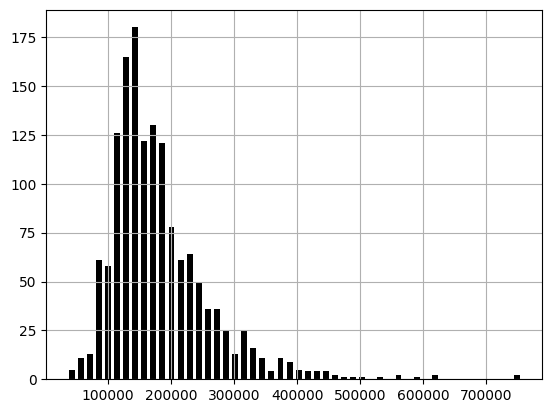

In [ ]:
plt.hist(a,bins=50,rwidth=(0.65),color='k')
plt.grid()

# **2.1 Matriz de corelación de los datos más relacionados con el precio de venta de las casas**

<ipython-input-9-049383dad5b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c=df.corr(method='pearson')


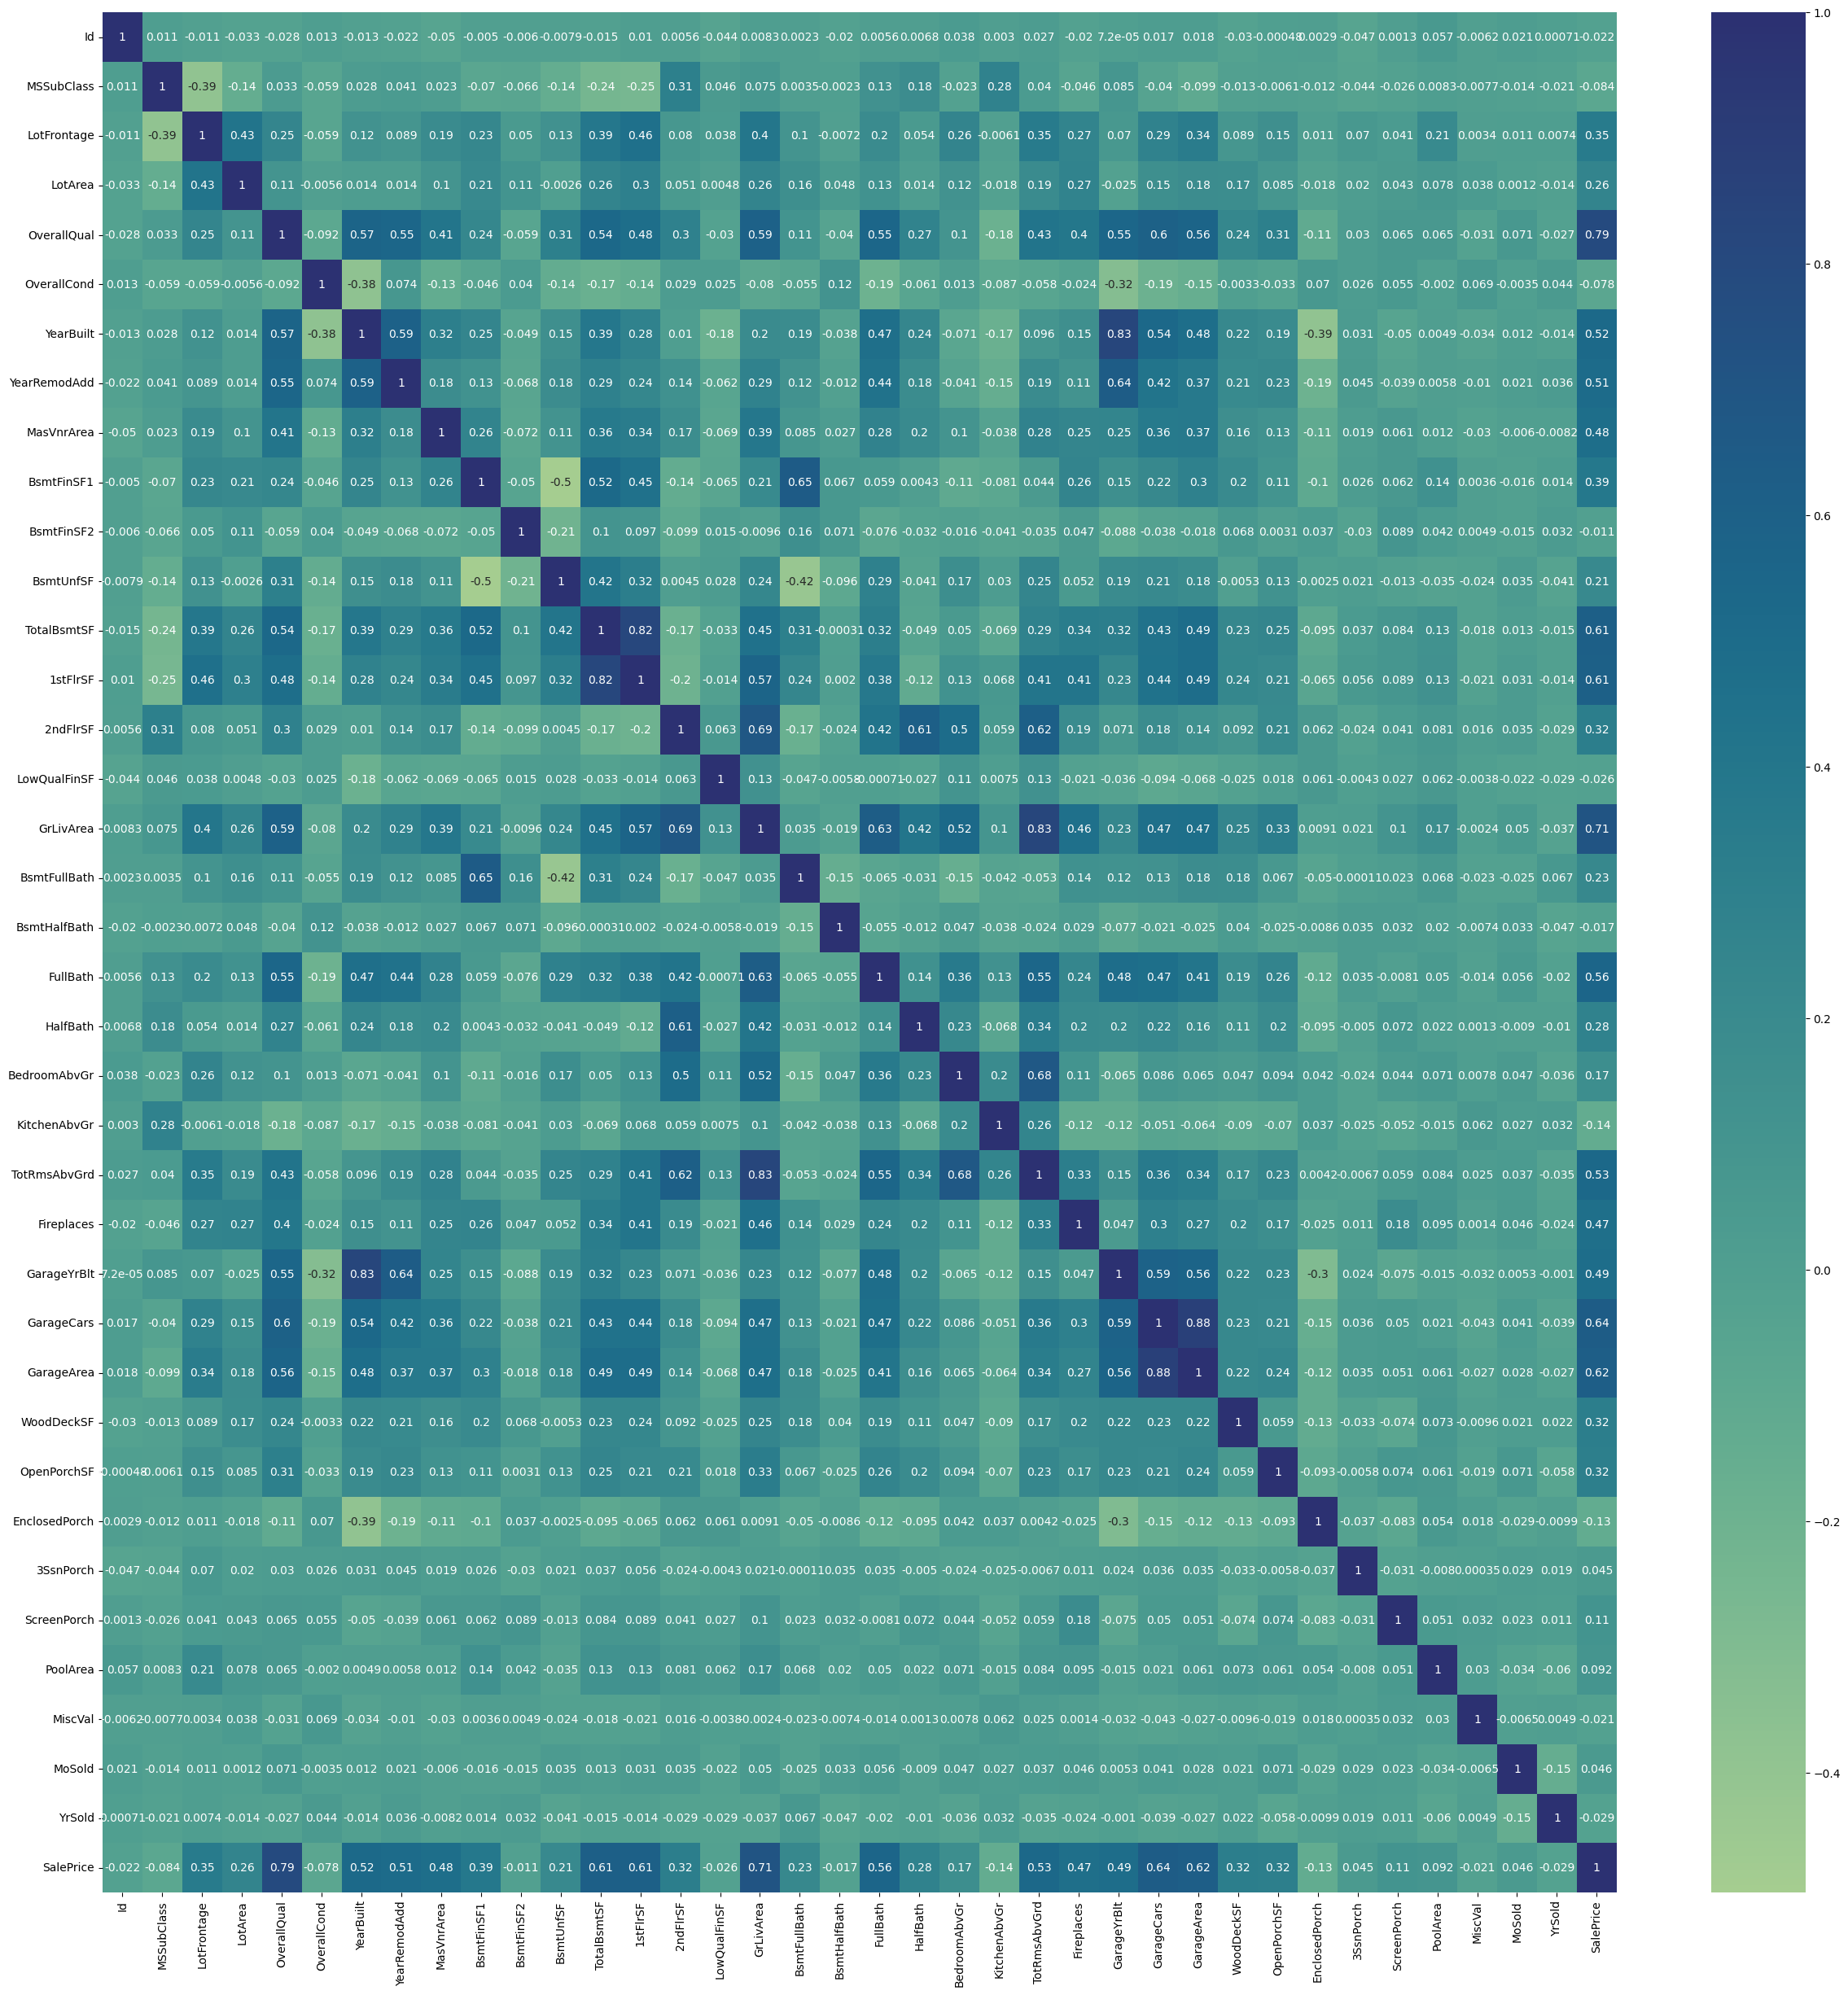

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


In [ ]:
df=pd.DataFrame(datos)
c=df.corr(method='pearson')
plt.figure(figsize=(30, 30))
sns.heatmap(c, annot=True, cmap="crest")
plt.show()
d=c['SalePrice'][c['SalePrice'] > 0.5].index # Datos de SalePrice que superan los 0.5 de relacion
print(d)

# **3. Se grafica la variable SalePrice junto con las variables que más se correlacionan a ella**

Text(0.5, 1.0, 'SalePrice vs YearBuilt')

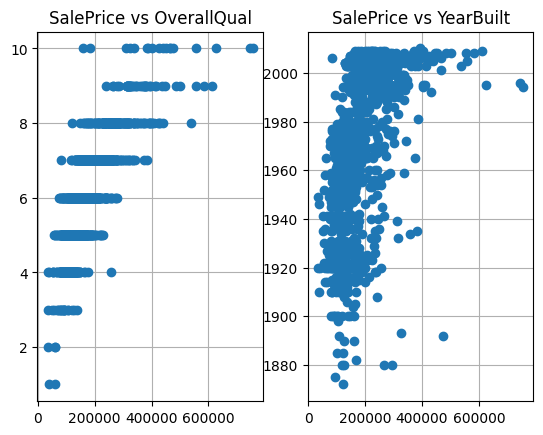

In [ ]:
# Relacion SalePrice vs OverallQual 
#-----------------------------------------------------------------------
a=datos['SalePrice']
e=datos['OverallQual']
plt.subplot(121)
plt.plot(a,e,"o")
plt.grid()
plt.title("SalePrice vs OverallQual")

#-----------------------------------------------------------------------
# Relacion SalePrice vs YearBuilt 
#-----------------------------------------------------------------------
a=datos['SalePrice']
f=datos['YearBuilt']
plt.subplot(122)
plt.plot(a,f,"o")
plt.grid()
plt.title("SalePrice vs YearBuilt")

Text(0.5, 1.0, 'SalePrice vs TotalBsmtSF')

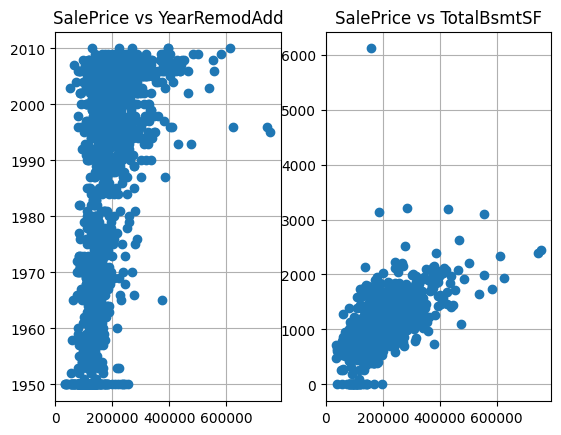

In [ ]:
# Relacion SalePrice vs YearRemodAdd
#-----------------------------------------------------------------------
a=datos['SalePrice']
g=datos['YearRemodAdd']
plt.subplot(121)
plt.plot(a,g,"o")
plt.grid()
plt.title("SalePrice vs YearRemodAdd")
#-----------------------------------------------------------------------
# Relacion SalePrice vs TotalBsmtSF
#-----------------------------------------------------------------------
a=datos['SalePrice']
h=datos['TotalBsmtSF']
plt.subplot(122)
plt.plot(a,h,"o")
plt.grid()
plt.title("SalePrice vs TotalBsmtSF")

Text(0.5, 1.0, 'SalePrice vs GrLivArea')

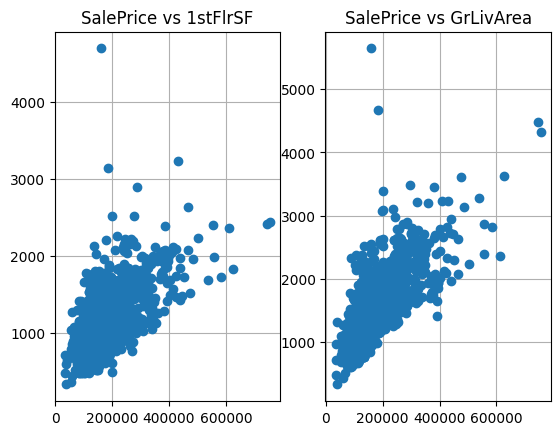

In [ ]:
# Relacion SalePrice vs 1stFlrSF
#-----------------------------------------------------------------------
a=datos['SalePrice']
i=datos['1stFlrSF']
plt.subplot(121)
plt.plot(a,i,"o")
plt.grid()
plt.title("SalePrice vs 1stFlrSF")
#-----------------------------------------------------------------------
# Relacion SalePrice vs GrLivArea
#-----------------------------------------------------------------------
a=datos['SalePrice']
j=datos['GrLivArea']
plt.subplot(122)
plt.plot(a,j,"o")
plt.grid()
plt.title("SalePrice vs GrLivArea")

Text(0.5, 1.0, 'SalePrice vs TotRmsAbvGrd')

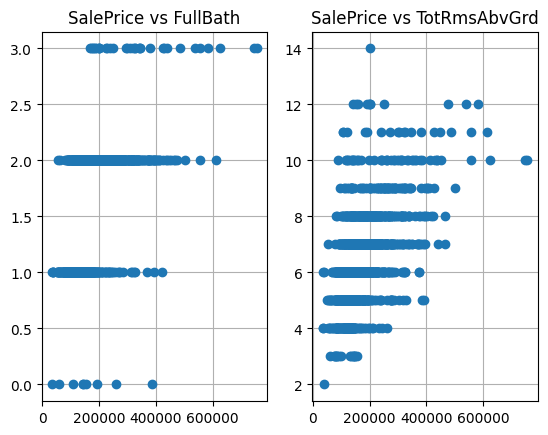

In [ ]:
# Relacion SalePrice vs FullBath
#-----------------------------------------------------------------------
a=datos['SalePrice']
k=datos['FullBath']
plt.subplot(121)
plt.plot(a,k,"o")
plt.grid()
plt.title("SalePrice vs FullBath")
#-----------------------------------------------------------------------
# Relacion SalePrice vs TotRmsAbvGrd
#-----------------------------------------------------------------------
a=datos['SalePrice']
l=datos['TotRmsAbvGrd']
plt.subplot(122)
plt.plot(a,l,"o")
plt.grid()
plt.title("SalePrice vs TotRmsAbvGrd")

Text(0.5, 1.0, 'SalePrice vs GarageArea')

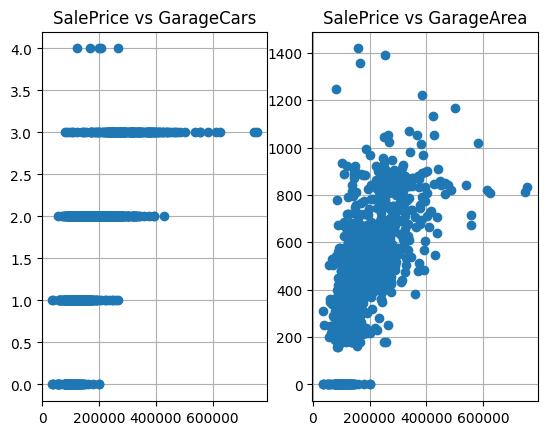

In [ ]:
# Relacion SalePrice vs GarageCars
#-----------------------------------------------------------------------
a=datos['SalePrice']
m=datos['GarageCars']
plt.subplot(121)
plt.plot(a,m,"o")
plt.grid()
plt.title("SalePrice vs GarageCars")
#-----------------------------------------------------------------------
# Relacion SalePrice vs GarageArea
#-----------------------------------------------------------------------
a=datos['SalePrice']
n=datos['GarageArea']
plt.subplot(122)
plt.plot(a,n,"o")
plt.grid()
plt.title("SalePrice vs GarageArea")

# **3.1 Confirmacion de datos nulos**

In [ ]:
ID_prueba = prueba['Id']

datos["SalePrice"].isna().sum()
correlacion = datos.corr()

columnas_entrenamiento = [i for i in d]
columnas_prueba = [d[i] for i in range(len(d) - 1)]

df_entrenamiento = datos[columnas_entrenamiento]
df_prueba = prueba[columnas_prueba]


total = df_entrenamiento.isnull().sum().sort_values(ascending=False)
porcentaje = (df_entrenamiento.isnull().sum()/df_entrenamiento.isnull().count()).sort_values(ascending=False)
datos_faltantes = pd.concat([total, porcentaje], axis=1, keys=['Cant. Nulos', 'Porcentaje'])
print(datos_faltantes.head(20))

              Cant. Nulos  Porcentaje
OverallQual             0         0.0
YearBuilt               0         0.0
YearRemodAdd            0         0.0
TotalBsmtSF             0         0.0
1stFlrSF                0         0.0
GrLivArea               0         0.0
FullBath                0         0.0
TotRmsAbvGrd            0         0.0
GarageCars              0         0.0
GarageArea              0         0.0
SalePrice               0         0.0


<ipython-input-15-42aa60da931a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = datos.corr()


In [ ]:
total_prueba = df_prueba.isnull().sum().sort_values(ascending=False)
porcentaje_prueba = (df_prueba.isnull().sum()/df_prueba.isnull().count()).sort_values(ascending=False)
datos_faltantes = pd.concat([total_prueba, porcentaje_prueba], axis=1, keys=['Cant. Nulos', 'Porcentaje'])
print(datos_faltantes.head(20))

              Cant. Nulos  Porcentaje
TotalBsmtSF             1    0.000685
GarageCars              1    0.000685
GarageArea              1    0.000685
OverallQual             0    0.000000
YearBuilt               0    0.000000
YearRemodAdd            0    0.000000
1stFlrSF                0    0.000000
GrLivArea               0    0.000000
FullBath                0    0.000000
TotRmsAbvGrd            0    0.000000


# **3.2 Normalización de datos**

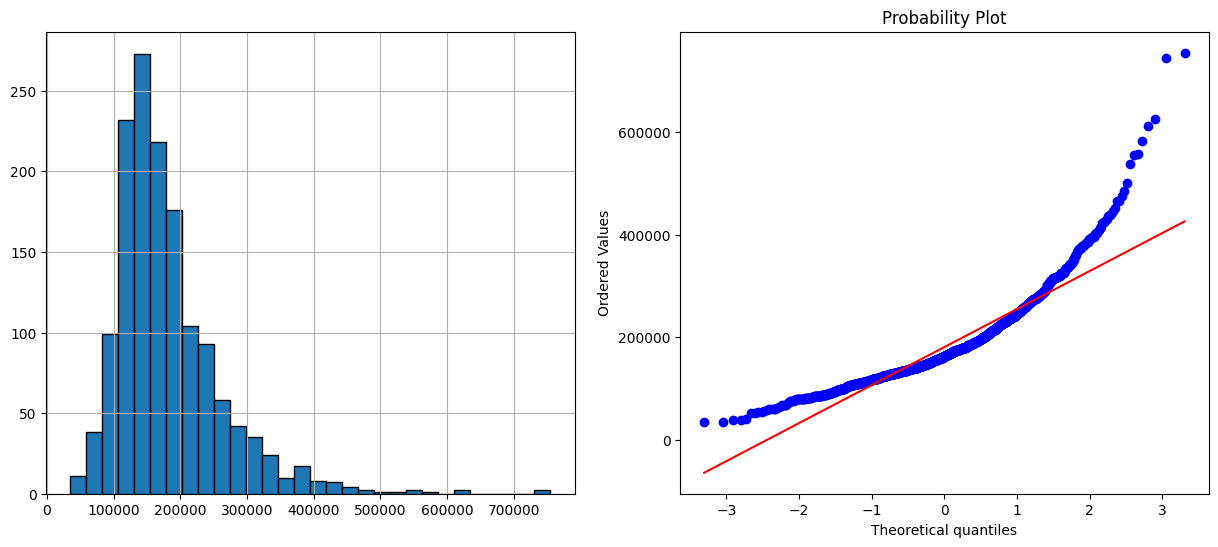

None


In [ ]:
# NORMALIZACION DE DATOS
#-----------------------------------------------------------------------

# Datos SalePrice sin normalizar
def diagmostic_grafico(df,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist(bins=30,edgecolor="Black")
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.show()
    
print(diagmostic_grafico(datos, "SalePrice"))



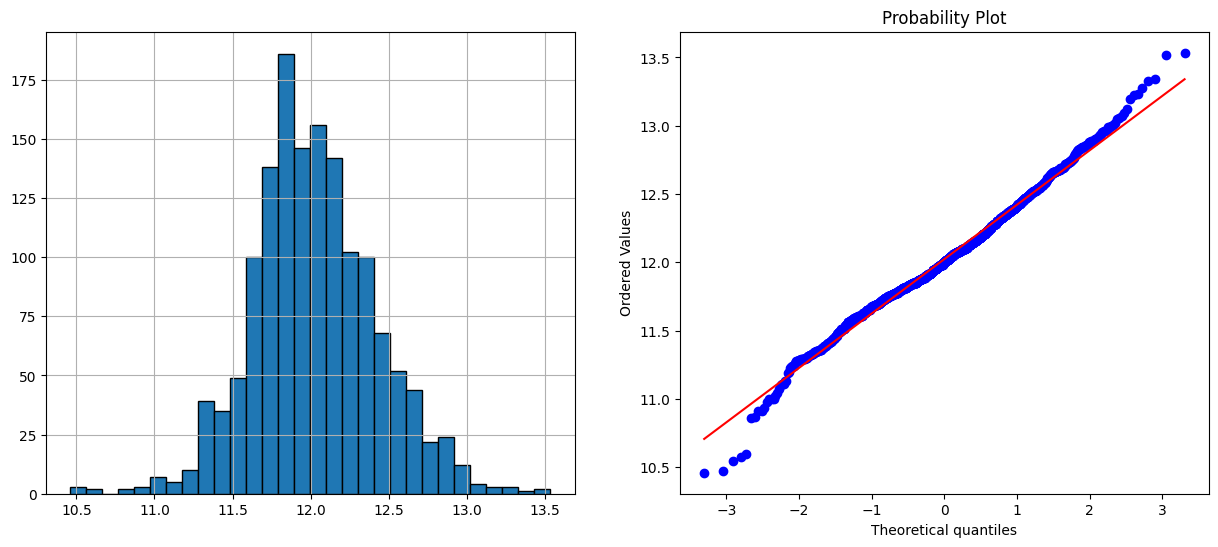

None


In [ ]:
# #-----------------------------------------------------------------------

# Datos SalePrice normalizados

df1=datos.copy()
df1["Tranformacion-Log"]=np.log(datos["SalePrice"])
df1.head()
print(diagmostic_grafico(df1, "Tranformacion-Log"))

# **3.3 Datos dummies**


In [ ]:
# DUMMIS
# ------------------------------------------------------------------------------------

d = pd.get_dummies(d)
df_prueba = pd.get_dummies(df_prueba)

datos_na = (df_prueba.isnull().sum() / len(df_prueba)) * 100
datos_na = datos_na.drop(datos_na[datos_na == 0].index).sort_values(ascending=False)
datos_faltantes = pd.DataFrame({'Porcentaje Faltante' :datos_na})
print(datos_faltantes.head())

for col in ( 'GarageArea', 'GarageCars','TotalBsmtSF'):
    df_prueba[col] = df_prueba[col].fillna(0)

             Porcentaje Faltante
TotalBsmtSF              0.06854
GarageCars               0.06854
GarageArea               0.06854


# **4. Selección de datos a utilizar para la prueba del modelo**

In [ ]:
from sklearn.model_selection import train_test_split

y_train = df_entrenamiento.SalePrice.values
df_entrenamiento.drop("SalePrice", axis = 1, inplace = True)
test_pct = 0.2
# Con la siguiente línea, de los datos df_entrenamiento_3 y de y_train, serán divididos aleatoriamente de
# tal forma que el 20% correspondrá a test y el 80% a train
X_train, X_test, y_train, y_test = train_test_split(df_entrenamiento, y_train, test_size=test_pct)

print(y_train)
print(X_train)



[220000 220000  75500 ... 129900 183900 372500]
      OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
133             8       2001          2002         1267      1296       1296   
162             7       2005          2005         1541      1541       1541   
614             4       1972          1972          630       630        630   
939             7       1940          1950         1032      1207       2403   
586             6       1918          2000          816       838        838   
...           ...        ...           ...          ...       ...        ...   
631             8       2006          2006         1554      1554       1554   
163             4       1956          1956          882       882        882   
8               7       1931          1950          952      1022       1774   
1265            7       1999          1999          691       713       1452   
678             8       2008          2008         2046      2046       

<ipython-input-20-30eaa36b5392>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entrenamiento.drop("SalePrice", axis = 1, inplace = True)


# **4.1 Modelo lineal**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
DT_predict = DT_model.predict(X_test) #Predictions on Testing data
print(DT_predict)

[206213.04347826 121855.38349515 153726.27619048 121855.38349515
 212870.         442657.04347826 121855.38349515 121855.38349515
 121855.38349515 212870.         184456.84172662 121855.38349515
  93285.24691358 121855.38349515 121855.38349515 121855.38349515
  93285.24691358  93285.24691358 121855.38349515 333837.6875
 153726.27619048 121855.38349515 180749.97142857  93285.24691358
 121855.38349515 121855.38349515 155154.8        311609.
 273689.86046512 153726.27619048 155154.8        130946.92307692
 180749.97142857 153726.27619048 121855.38349515 184750.
 153726.27619048 240557.         155154.8        121855.38349515
 212870.         442657.04347826 273689.86046512 180749.97142857
 121855.38349515 121855.38349515 273689.86046512 121855.38349515
 130946.92307692 184456.84172662 180749.97142857 121855.38349515
 121855.38349515 153726.27619048 180749.97142857 244891.47619048
 180749.97142857  93285.24691358 333837.6875     180749.97142857
 184456.84172662 180749.97142857 121855.38349

# **4.2 Creacion de un nuevo Dataframe para almacenar los datos de predicción**

In [ ]:
df_Estimador_final = pd.DataFrame(DT_predict, columns=['SalePrice'])
indice = pd.DataFrame(ID_prueba,columns=['Id'])
resultado1 = pd.concat([indice, df_Estimador_final], axis=1)
print(resultado1.head(20))


      Id      SalePrice
0   1461  206213.043478
1   1462  121855.383495
2   1463  153726.276190
3   1464  121855.383495
4   1465  212870.000000
5   1466  442657.043478
6   1467  121855.383495
7   1468  121855.383495
8   1469  121855.383495
9   1470  212870.000000
10  1471  184456.841727
11  1472  121855.383495
12  1473   93285.246914
13  1474  121855.383495
14  1475  121855.383495
15  1476  121855.383495
16  1477   93285.246914
17  1478   93285.246914
18  1479  121855.383495
19  1480  333837.687500
